<a href="https://colab.research.google.com/github/alikashlan10/fraudDetection/blob/main/FraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Necessary libraries**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout
from sklearn.metrics import classification_report
import torch
import pandas as pd
from google.colab import drive
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# **loading data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#loading train dataset
train_data_path= "/content/drive/MyDrive/fraud_data/frauddetection.csv"
df = pd.read_csv(train_data_path)

In [ ]:
df.sample(10)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
17481,0,0.9,0.238589,-1,46,50,0.019736,-0.841688,AB,777,...,1,1500,0,INTERNET,6.545230,other,0,1,0,0
16148,0,0.6,0.737198,-1,20,20,0.014913,-0.250228,AC,1665,...,0,510,0,INTERNET,4.731173,windows,0,1,0,0
10801,1,0.9,0.881350,-1,175,40,0.000704,-1.069880,AB,1129,...,0,1500,0,INTERNET,11.636822,windows,0,1,0,7
11499,0,0.6,0.157231,-1,44,20,0.016025,-1.273965,AC,2982,...,0,200,0,INTERNET,7.027600,linux,1,1,0,0
8322,1,0.9,0.181763,-1,37,30,0.015979,27.325001,AA,1196,...,0,200,0,INTERNET,3.673644,linux,0,1,0,6
15512,0,0.7,0.031593,-1,160,30,0.000840,-1.621606,AD,4303,...,0,1500,0,INTERNET,3.303645,windows,0,1,0,0
13984,0,0.8,0.309574,-1,62,50,0.001659,13.936020,AA,2407,...,1,500,1,INTERNET,4.829848,linux,0,2,0,0
14400,0,0.6,0.066439,-1,31,50,0.027776,-0.607920,AC,933,...,0,1500,0,INTERNET,6.598066,linux,0,1,0,0
12748,0,0.4,0.200517,61,18,30,0.012721,29.680269,AA,1559,...,0,1500,0,INTERNET,6.235782,linux,1,1,0,0
6511,1,0.9,0.155342,-1,69,30,0.008353,-1.158405,AB,2845,...,0,200,0,INTERNET,3.178522,windows,0,1,0,4


# **Data exploration**

In [ ]:
df.info()
# 5 objects
# 8 floats
# 18 integers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21028 entries, 0 to 21027
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   fraud_bool                        21028 non-null  int64  
 1   income                            21028 non-null  float64
 2   name_email_similarity             21028 non-null  float64
 3   prev_address_months_count         21028 non-null  int64  
 4   current_address_months_count      21028 non-null  int64  
 5   customer_age                      21028 non-null  int64  
 6   days_since_request                21028 non-null  float64
 7   intended_balcon_amount            21028 non-null  float64
 8   payment_type                      21028 non-null  object 
 9   zip_count_4w                      21028 non-null  int64  
 10  velocity_6h                       21028 non-null  float64
 11  velocity_24h                      21028 non-null  float64
 12  velo

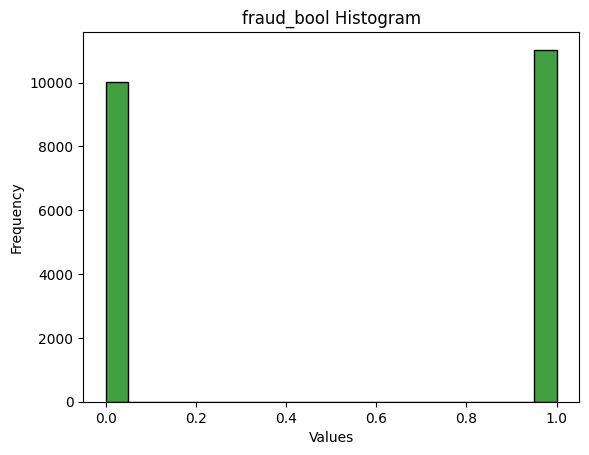

In [ ]:
sns.histplot(df['fraud_bool'], bins=20, kde=False, color='green')
plt.title('fraud_bool Histogram')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

# target column is int46 --> binary values (0 / 1)
# 0 --> not fraud  /// 1 --> fraud
# target column is roughly balanced

In [ ]:
df['device_os'].value_counts()

windows      8887
other        5881
linux        4944
macintosh    1168
x11           148
Name: device_os, dtype: int64

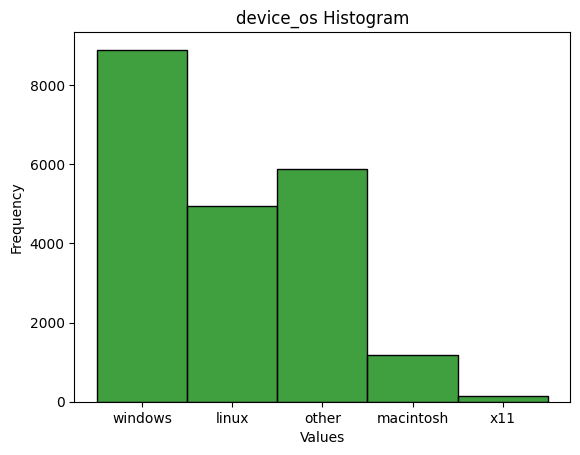

In [ ]:
sns.histplot(df['device_os'], bins=20, kde=False, color='green')
plt.title('device_os Histogram')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()
#5 categories

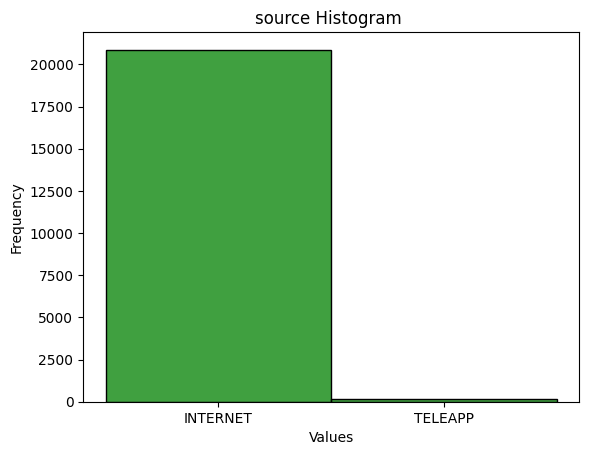

INTERNET    20873
TELEAPP       155
Name: source, dtype: int64

In [ ]:
sns.histplot(df['source'], bins=20, kde=False, color='green')
plt.title('source Histogram ')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

df['source'].value_counts()

**housing_status**

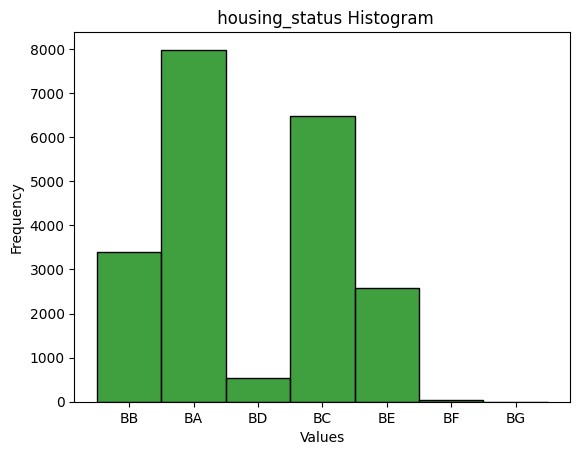

BA    7983
BC    6490
BB    3388
BE    2588
BD     542
BF      34
BG       3
Name: housing_status, dtype: int64

In [ ]:
sns.histplot(df['housing_status'], bins=20, kde=False, color='green')
plt.title(' housing_status Histogram')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

df['housing_status'].value_counts()

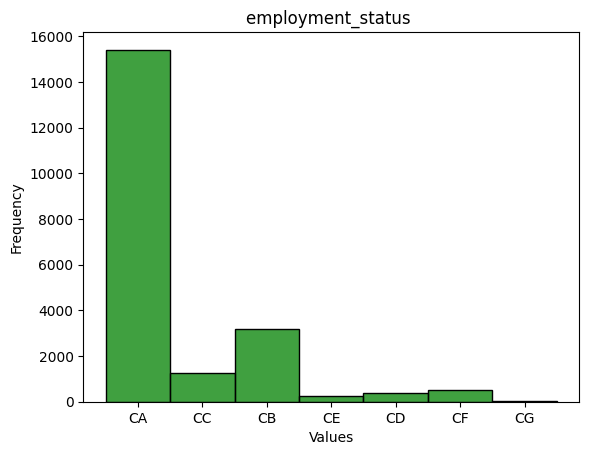

CA    15419
CB     3205
CC     1253
CF      500
CD      384
CE      257
CG       10
Name: employment_status, dtype: int64

In [ ]:
sns.histplot(df['employment_status'], bins=20, kde=False, color='green')
plt.title('employment_status ')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

df['employment_status'].value_counts()
#7 UNIQUE CATEGORIES

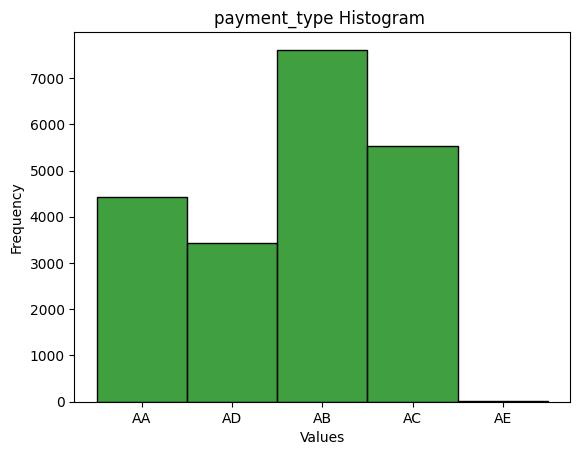

AB    7613
AC    5541
AA    4438
AD    3431
AE       5
Name: payment_type, dtype: int64

In [ ]:
sns.histplot(df['payment_type'], bins=20, kde=False, color='green')
plt.title('payment_type Histogram ')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

df['payment_type'].value_counts()
#5 CATEGORIES

**plotting correlation between columns**

<ipython-input-14-70de1acdcb4a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


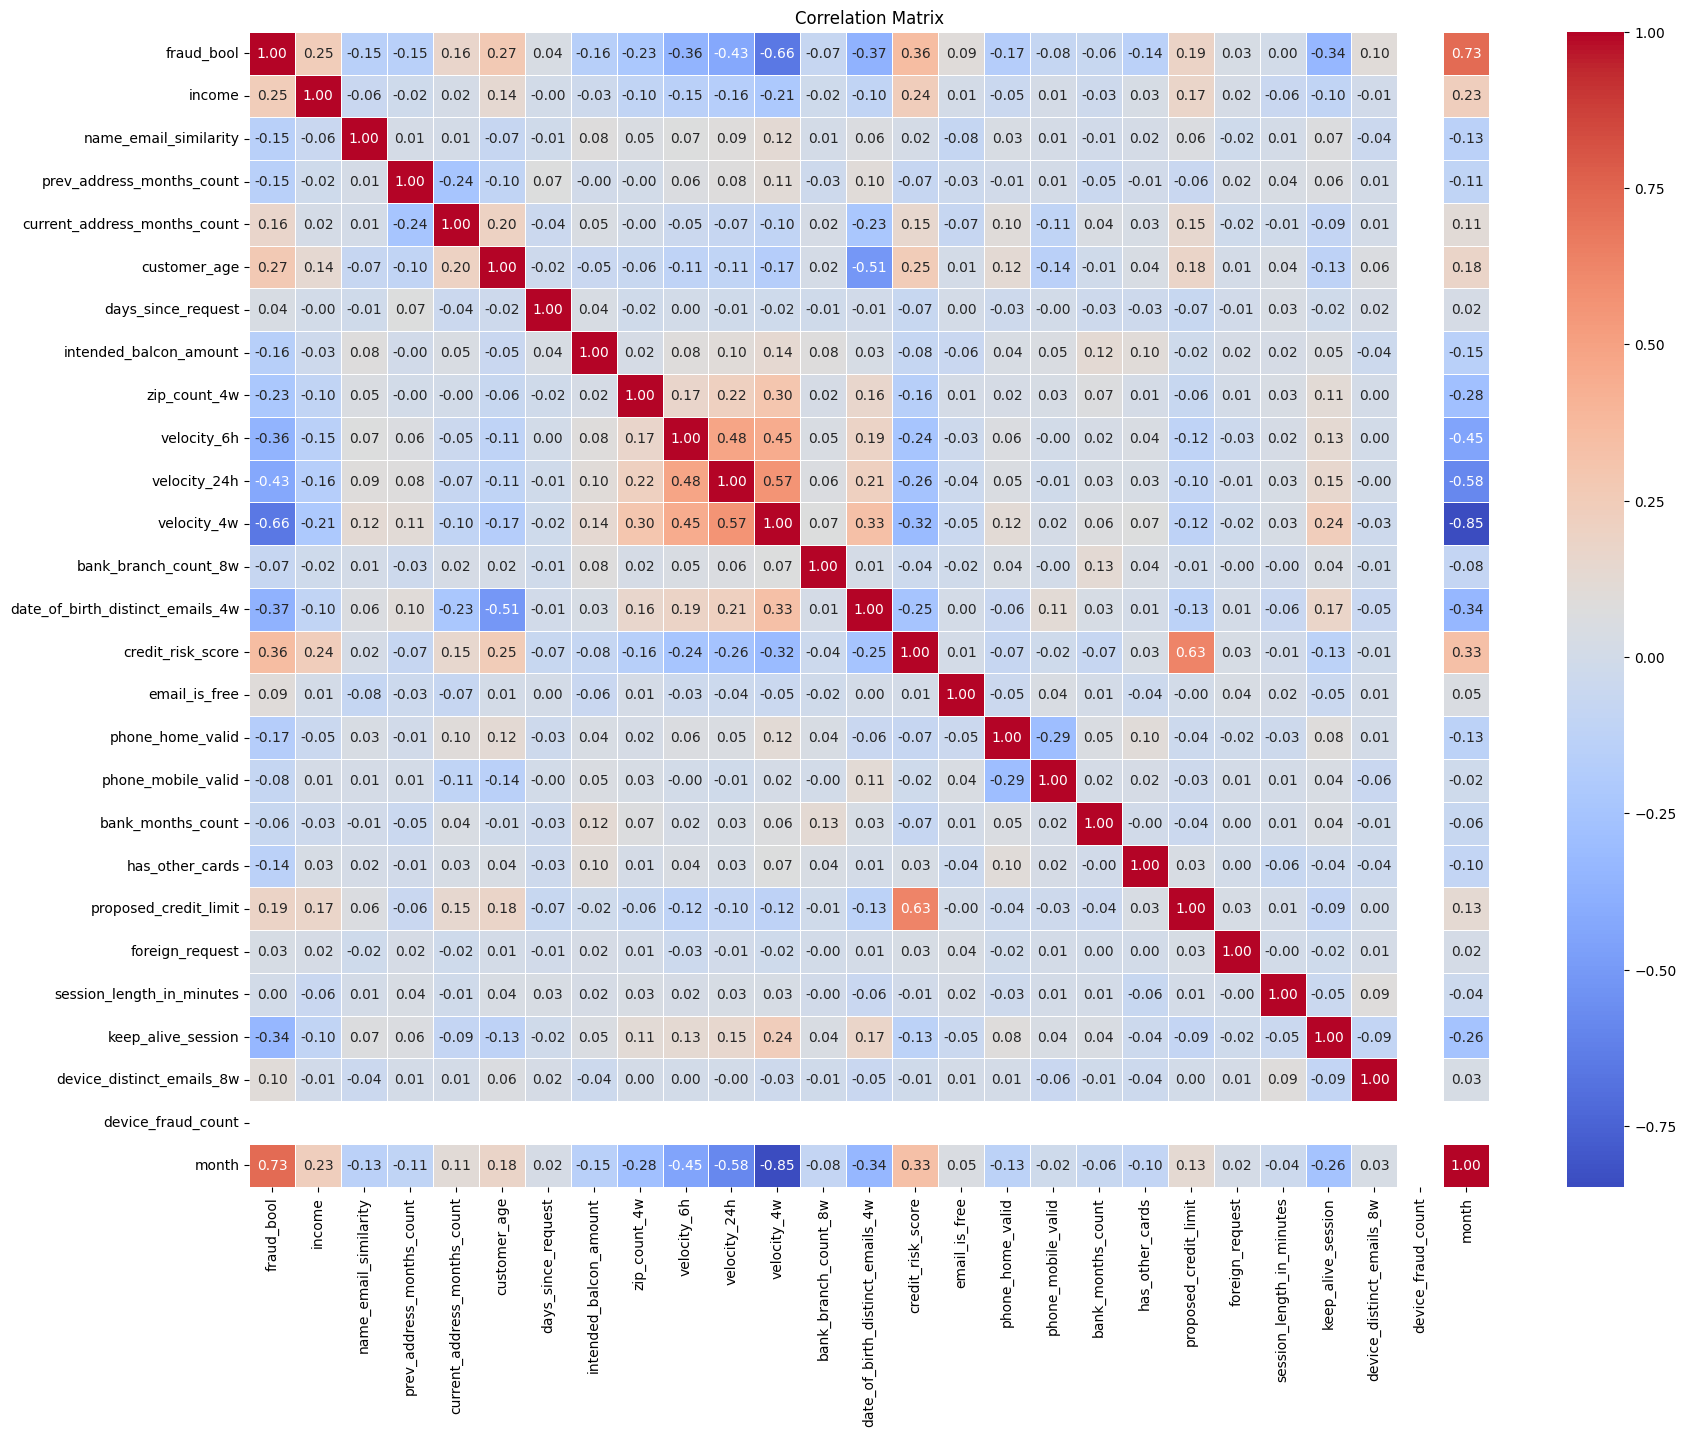

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# **Preprocessing**

In [ ]:
df.isnull()
#NO NULL VALUES
#df.dropna()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21023,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21024,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21025,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21026,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#dropping prev_address_months_count cloumn
#most of rows are missing values

df=df.drop(['prev_address_months_count'],axis=1)


**Replace missing values**

In [ ]:
# Calculate the mean of the column (excluding the specific value)
mean_value = df.loc[df['session_length_in_minutes'] != -1, 'session_length_in_minutes'].mean()

# Replace the specific value with the mean
df['session_length_in_minutes'] = df['session_length_in_minutes'].replace(-1, mean_value)

In [ ]:
df['session_length_in_minutes'].value_counts()

8.239753     33
4.924644      2
3.505442      2
7.275961      1
5.413456      1
             ..
4.250288      1
0.879244      1
39.349807     1
5.072361      1
17.595259     1
Name: session_length_in_minutes, Length: 20994, dtype: int64

In [ ]:
df['device_distinct_emails_8w'].value_counts()
df['device_distinct_emails_8w'] = df['device_distinct_emails_8w'].replace(-1,1)

In [ ]:
# Calculate the mean of the column (excluding the specific value)
mean_value = df.loc[df['current_address_months_count'] != -1, 'current_address_months_count'].mean()

# Replace the specific value with the mean
df['current_address_months_count'] = df['current_address_months_count'].replace(-1, mean_value)

#NO MISSING VALUES
df["current_address_months_count"].value_counts()

7.0      230
3.0      221
6.0      218
8.0      214
5.0      212
        ... 
392.0      1
395.0      1
389.0      1
390.0      1
393.0      1
Name: current_address_months_count, Length: 395, dtype: int64

In [ ]:
# Calculate the mean of the column (excluding the specific value)
mean_value = df.loc[df['bank_months_count'] != -1, 'bank_months_count'].mean()

# Replace the specific value with the mean
df['bank_months_count'] = df['bank_months_count'].replace(-1, mean_value)

#NO MISSING VALUES
df["bank_months_count"].value_counts()

15.474042    5445
1.000000     3607
30.000000    1798
28.000000    1422
25.000000    1342
15.000000    1229
2.000000      794
31.000000     778
5.000000      775
10.000000     701
20.000000     684
26.000000     367
21.000000     349
19.000000     316
6.000000      253
11.000000     229
9.000000      169
4.000000      168
27.000000     168
24.000000     113
3.000000       90
29.000000      77
22.000000      49
16.000000      36
14.000000      30
18.000000      23
7.000000        8
12.000000       4
17.000000       2
23.000000       1
8.000000        1
Name: bank_months_count, dtype: int64

**LABEL ENCODING**

In [ ]:
#label encoding for all categorical columns
categorical_data_t = df.select_dtypes(exclude=['int', 'float'])
categorical_data_t.columns

le = LabelEncoder()

for column in categorical_data_t.columns:
      df[column] = le.fit_transform(df[column])

In [ ]:
df.sample(10)

,fraud_bool,income,name_email_similarity,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
17360,0,0.7,0.767593,36.0,30,0.010769,-1.719058,0,1488,12208.642434,...,0,1500,0,0,4.429482,0,0,1,0,0
18512,0,0.9,0.427083,190.0,50,0.007752,97.722694,0,1971,7975.962307,...,1,200,0,0,5.180787,2,1,1,0,0
20384,0,0.5,0.756216,41.0,50,0.027427,-1.037917,2,1541,6585.735203,...,0,200,0,0,8.889595,2,0,1,0,0
10870,1,0.9,0.194313,154.0,20,0.003257,-0.502260,2,75,2503.809986,...,0,990,0,0,2.139938,0,1,1,0,7
3695,1,0.8,0.697601,273.0,50,6.366450,-0.678739,2,1162,8884.458440,...,0,2000,0,0,6.830716,3,0,1,0,2
6789,1,0.7,0.240762,114.0,50,0.000939,-0.329190,2,1044,2609.754808,...,0,200,0,0,3.839067,3,1,1,0,5
6360,1,0.9,0.631306,181.0,40,0.008653,-0.899143,2,713,3366.701113,...,0,1500,0,0,2.107986,3,0,1,0,4
13034,0,0.1,0.574313,119.0,20,0.011180,-1.425968,1,2743,4761.524470,...,0,200,0,0,1.776362,2,1,1,0,0
3710,1,0.9,0.028319,194.0,40,0.003627,-0.962393,2,2476,4681.456698,...,0,200,0,0,8.121903,0,0,2,0,2
16555,0,0.8,0.995721,70.0,80,0.031284,37.338747,0,1501,8399.370450,...,0,200,0,0,27.325517,4,0,1,0,0


In [ ]:
df['source'].value_counts()

0    20873
1      155
Name: source, dtype: int64

**Normalization**

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

X = df.values

# Apply Min-Max scaling
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Create a new DataFrame with the normalized values
df_normalized = pd.DataFrame(X_normalized, columns=df.columns)



In [ ]:
df_normalized.sample(20)


,fraud_bool,income,name_email_similarity,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
20679,0.0,0.750,0.569982,0.124051,0.250,0.000139,0.087754,0.75,0.052607,0.480060,...,0.0,0.005236,0.0,0.0,0.044302,0.50,1.0,0.5,0.0,0.000000
13440,0.0,0.250,0.174830,0.139241,0.125,0.000146,0.085712,0.25,0.874173,0.547253,...,0.0,0.005236,1.0,0.0,0.043640,0.00,1.0,0.5,0.0,0.000000
13849,0.0,0.250,0.120276,0.794937,0.500,0.000176,0.212597,0.00,0.617136,0.445135,...,1.0,0.005236,0.0,0.0,0.018554,0.00,1.0,0.5,0.0,0.000000
304,1.0,0.375,0.059844,0.364557,0.375,0.000331,0.087606,0.50,0.164129,0.397604,...,0.0,0.005236,0.0,0.0,0.102540,0.00,0.0,1.0,0.0,0.000000
12564,0.0,1.000,0.045895,0.306329,0.125,0.000089,0.207767,0.00,0.251038,0.528864,...,0.0,0.005236,0.0,0.0,0.033534,0.75,0.0,0.5,0.0,0.000000
20269,0.0,0.000,0.500458,0.043038,0.125,0.000152,0.515228,0.00,0.135210,0.080151,...,0.0,0.005236,0.0,0.0,0.068318,0.75,0.0,0.5,0.0,0.000000
13076,0.0,0.375,0.110765,0.106329,0.125,0.000025,0.323817,0.00,0.315336,0.321075,...,1.0,0.162304,0.0,0.0,0.233269,0.75,1.0,0.5,0.0,0.000000
9512,1.0,0.625,0.659405,0.296203,0.625,0.000084,0.092985,0.25,0.137210,0.306242,...,0.0,0.162304,0.0,0.0,0.125090,0.50,0.0,0.5,0.0,0.857143
15089,0.0,0.625,0.269337,0.964557,0.125,0.000070,0.090728,0.50,0.191509,0.102554,...,0.0,0.685864,0.0,0.0,0.026657,0.50,1.0,0.5,0.0,0.000000
2559,1.0,0.000,0.106612,0.513924,0.125,0.264319,0.093555,0.25,0.285495,0.305630,...,0.0,0.685864,0.0,0.0,0.099652,0.75,0.0,0.5,0.0,0.142857


**Outliers**

# **Modeling**

In [ ]:
X = df_normalized.drop('fraud_bool',axis=1)

In [ ]:
Y = df_normalized['fraud_bool']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

**First Model**

In [ ]:
model = Sequential()

In [ ]:
X_train.

In [ ]:

from tensorflow.keras.callbacks import EarlyStopping
# bulding layers

model = Sequential()

#input layer
model.add(Dense(units=128, activation='relu', input_dim = X_train.shape[1]))



#hidden layers
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=32, activation='relu'))

#output
model.add(Dense(units=1, activation='sigmoid'))  #sigmoid activation for binary classification

In [ ]:
# compiling model
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.3,callbacks=[early_stopping])

Epoch 1/50
644/644 [==============================] - 7s 6ms/step - loss: 0.2717 - accuracy: 0.8892 - val_loss: 0.1918 - val_accuracy: 0.9235
Epoch 2/50
644/644 [==============================] - 2s 3ms/step - loss: 0.1909 - accuracy: 0.9264 - val_loss: 0.1746 - val_accuracy: 0.9334
Epoch 3/50
644/644 [==============================] - 2s 3ms/step - loss: 0.1824 - accuracy: 0.9292 - val_loss: 0.1643 - val_accuracy: 0.9361
Epoch 4/50
644/644 [==============================] - 2s 3ms/step - loss: 0.1761 - accuracy: 0.9326 - val_loss: 0.1617 - val_accuracy: 0.9380
Epoch 5/50
644/644 [==============================] - 2s 3ms/step - loss: 0.1703 - accuracy: 0.9336 - val_loss: 0.1609 - val_accuracy: 0.9343
Epoch 6/50
644/644 [==============================] - 2s 4ms/step - loss: 0.1679 - accuracy: 0.9353 - val_loss: 0.1633 - val_accuracy: 0.9357
Epoch 7/50
644/644 [==============================] - 3s 4ms/step - loss: 0.1658 - accuracy: 0.9347 - val_loss: 0.1614 - val_accuracy: 0.9375
Epoch 

**Both training accuracy and validation acuraccy are performing well during the model fitting --> NO Underfitting**

**Moderate Overfitting**

In [ ]:
# Use the model to make predictions on the new data
predictions = model.predict(X_test)

# For classification problems, get predicted class labels
labels = (predictions > 0.5).astype(int)

# Print or use the predictions as needed
print(labels)

198/198 [==============================] - 0s 1ms/step
[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]


In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Print the test accuracy
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

198/198 [==============================] - 0s 2ms/step - loss: 0.1667 - accuracy: 0.9401
Test Accuracy: 94.01%


**ACCURACY : 94.12%** ✅

In [ ]:
print(classification_report(y_test, labels))

              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94      2939
         1.0       0.99      0.90      0.94      3370

    accuracy                           0.94      6309
   macro avg       0.94      0.94      0.94      6309
weighted avg       0.94      0.94      0.94      6309



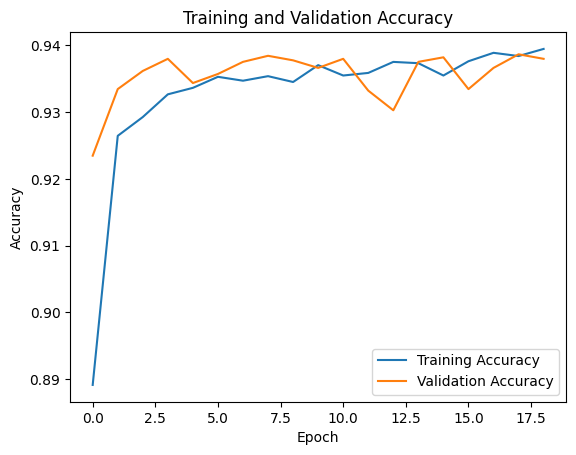

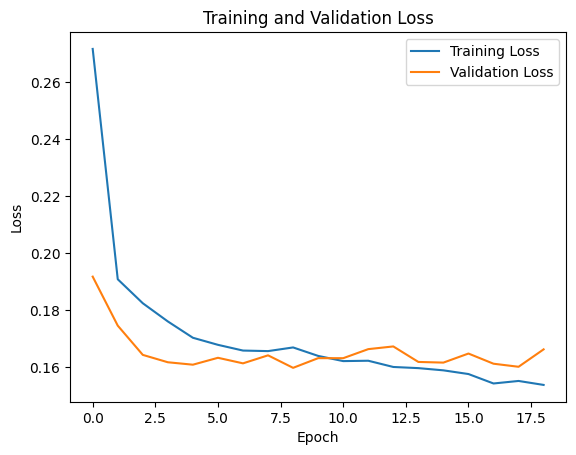

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
for true_val, pred_val in zip(y_test, lol):
    print(f'True: {true_val}, Predicted: {pred_val}')

Streaming output truncated to the last 5000 lines.
True: 1.0, Predicted: [1]
True: 1.0, Predicted: [1]
True: 1.0, Predicted: [1]
True: 1.0, Predicted: [1]
True: 1.0, Predicted: [1]
True: 1.0, Predicted: [1]
True: 0.0, Predicted: [0]
True: 1.0, Predicted: [1]
True: 1.0, Predicted: [1]
True: 0.0, Predicted: [0]
True: 1.0, Predicted: [1]
True: 0.0, Predicted: [0]
True: 0.0, Predicted: [0]
True: 0.0, Predicted: [0]
True: 1.0, Predicted: [1]
True: 0.0, Predicted: [0]
True: 1.0, Predicted: [1]
True: 0.0, Predicted: [0]
True: 0.0, Predicted: [0]
True: 0.0, Predicted: [0]
True: 1.0, Predicted: [0]
True: 0.0, Predicted: [0]
True: 1.0, Predicted: [1]
True: 1.0, Predicted: [1]
True: 0.0, Predicted: [0]
True: 0.0, Predicted: [0]
True: 0.0, Predicted: [0]
True: 1.0, Predicted: [1]
True: 1.0, Predicted: [1]
True: 0.0, Predicted: [0]
True: 1.0, Predicted: [1]
True: 1.0, Predicted: [1]
True: 1.0, Predicted: [1]
True: 1.0, Predicted: [1]
True: 1.0, Predicted: [1]
True: 0.0, Predicted: [0]
True: 1.0, Pr

**Model modifications**

In [ ]:
# bulding layers


model2 = Sequential()

#input layer
model2.add(Dense(units=64, activation='relu', input_dim= X_train.shape[1]))

#hidden layers
#model.add(Dense(units=128, activation='relu'))

model2.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))

model2.add(Dense(units=32, activation='relu'))

#output
model2.add(Dense(units=1, activation='sigmoid'))  #sigmoid activation for binary classification

In [ ]:
# compiling model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)


history2 = model2.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.3,callbacks=[early_stopping])

Epoch 1/50
644/644 [==============================] - 4s 4ms/step - loss: 0.2526 - accuracy: 0.9004 - val_loss: 0.1793 - val_accuracy: 0.9316
Epoch 2/50
644/644 [==============================] - 2s 3ms/step - loss: 0.1853 - accuracy: 0.9275 - val_loss: 0.1658 - val_accuracy: 0.9375
Epoch 3/50
644/644 [==============================] - 2s 3ms/step - loss: 0.1740 - accuracy: 0.9316 - val_loss: 0.1773 - val_accuracy: 0.9291
Epoch 4/50
644/644 [==============================] - 2s 3ms/step - loss: 0.1710 - accuracy: 0.9337 - val_loss: 0.1590 - val_accuracy: 0.9384
Epoch 5/50
644/644 [==============================] - 2s 3ms/step - loss: 0.1668 - accuracy: 0.9342 - val_loss: 0.1617 - val_accuracy: 0.9386
Epoch 6/50
644/644 [==============================] - 2s 2ms/step - loss: 0.1631 - accuracy: 0.9356 - val_loss: 0.1597 - val_accuracy: 0.9386
Epoch 7/50
644/644 [==============================] - 2s 3ms/step - loss: 0.1621 - accuracy: 0.9375 - val_loss: 0.1607 - val_accuracy: 0.9364
Epoch 

In [ ]:
# Use the model to make predictions on the new data
predictions2 = model2.predict(X_test)

# For classification problems, get predicted class labels
labels2 = (predictions2 > 0.5).astype(int)

# Print or use the predictions as needed
print(labels2)

198/198 [==============================] - 0s 2ms/step
[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]


In [ ]:
# Evaluate the model on the test data
test_loss2, test_accuracy2 = model2.evaluate(X_test, y_test)

# Print the test accuracy
print(f'Test Accuracy: {test_accuracy2 * 100:.2f}%')

198/198 [==============================] - 0s 2ms/step - loss: 0.1673 - accuracy: 0.9395
Test Accuracy: 93.95%


**ACCURACY : 93.60%** ✅

In [ ]:
print(classification_report(y_test, labels2))

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93      2939
         1.0       1.00      0.88      0.93      3370

    accuracy                           0.93      6309
   macro avg       0.94      0.94      0.93      6309
weighted avg       0.94      0.93      0.93      6309



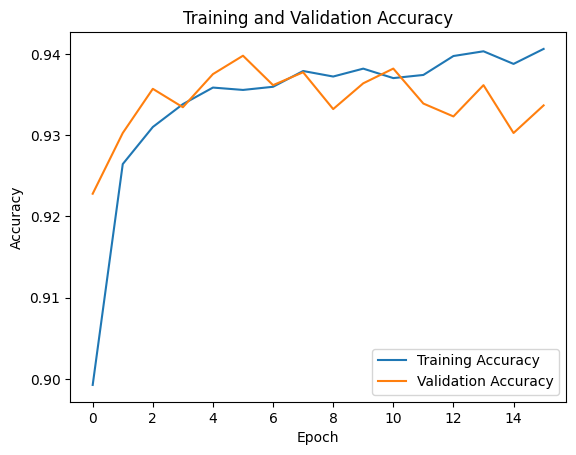

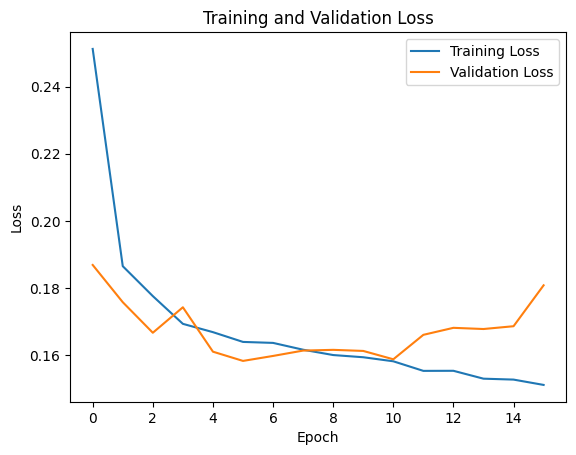

In [ ]:
# Plot training and validation accuracy
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Moderate Overfitting**

**----------------------------------------------------------------------------**
**----------------------------------------------------------------------------**

# **TABNET MODEL**

In [ ]:
pip install pytorch-tabnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 951.5 kB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
TX_train, TX_test, Ty_train, Ty_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:

# Initialize TabNetClassifier
clf = TabNetClassifier()

# Train the model
clf.fit(TX_train.values, Ty_train.values, eval_set=[(TX_test.values, Ty_test.values)], patience=10, max_epochs=100)



/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.46516 | val_0_auc: 0.91004 |  0:00:01s
epoch 1  | loss: 0.24717 | val_0_auc: 0.9409  |  0:00:02s
epoch 2  | loss: 0.21018 | val_0_auc: 0.9447  |  0:00:02s
epoch 3  | loss: 0.20039 | val_0_auc: 0.94926 |  0:00:03s
epoch 4  | loss: 0.19332 | val_0_auc: 0.94343 |  0:00:04s
epoch 5  | loss: 0.1925  | val_0_auc: 0.94652 |  0:00:05s
epoch 6  | loss: 0.18789 | val_0_auc: 0.94483 |  0:00:06s
epoch 7  | loss: 0.18419 | val_0_auc: 0.94949 |  0:00:07s
epoch 8  | loss: 0.18232 | val_0_auc: 0.95236 |  0:00:08s
epoch 9  | loss: 0.18177 | val_0_auc: 0.95838 |  0:00:09s
epoch 10 | loss: 0.17896 | val_0_auc: 0.95887 |  0:00:10s
epoch 11 | loss: 0.17675 | val_0_auc: 0.95843 |  0:00:11s
epoch 12 | loss: 0.17453 | val_0_auc: 0.95718 |  0:00:12s
epoch 13 | loss: 0.17192 | val_0_auc: 0.95948 |  0:00:13s
epoch 14 | loss: 0.17316 | val_0_auc: 0.96444 |  0:00:14s
epoch 15 | loss: 0.17007 | val_0_auc: 0.96755 |  0:00:16s
epoch 16 | loss: 0.16876 | val_0_auc: 0.96754 |  0:00:18s
epoch 17 | los

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [ ]:
# Make predictions
Ty_pred = clf.predict(TX_test.values)

# Evaluate the model
accuracy = accuracy_score(Ty_test,Ty_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print('Classification Report:')
print(classification_report(Ty_test, Ty_pred))

Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94      1950
         1.0       0.98      0.91      0.95      2256

    accuracy                           0.94      4206
   macro avg       0.94      0.95      0.94      4206
weighted avg       0.95      0.94      0.94      4206



In [ ]:
accuracy = accuracy_score(Ty_test, Ty_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.94
